# Simple Linear Regression Test

## Part 1: Testing against sklearn library

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
X = fetch_california_housing()['data']
y = fetch_california_housing()['target']

Selected column: *MedInc*, the median house age in block group.

In [4]:
Xs = [x[0] for x in X]
ys = y

### Plot

In [5]:
import matplotlib.pyplot as plt
plt.style.use('classic')

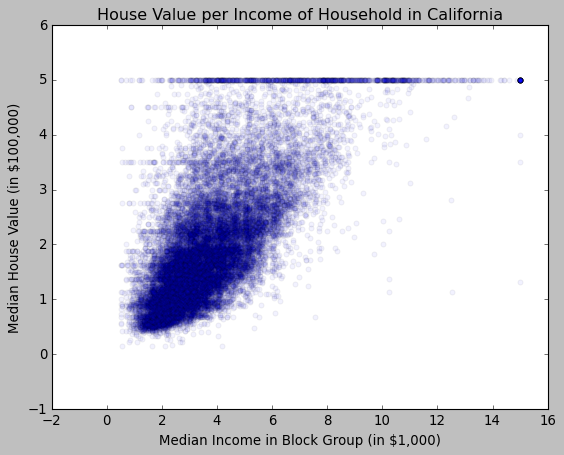

In [6]:
plt.scatter(Xs, ys, alpha=0.05)
plt.title('House Value per Income of Household in California')
plt.xlabel('Median Income in Block Group (in $1,000)')
plt.ylabel('Median House Value (in $100,000)')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linreg = LinearRegression()

from numpy import array
linreg.fit(
    array(X_train).reshape(-1,1), 
    y_train
)

LinearRegression()

In [11]:
print("Beta:", linreg.coef_)
print("Intercept:", linreg.intercept_)

Beta: [0.41661921]
Intercept: 0.4555867709600283


In [12]:
y_test_pred = linreg.predict(array(X_test).reshape(-1,1))

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from numpy import sqrt
mse = mean_squared_error(y_test, y_test_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.8431855626375866
R²: 0.4702005871853432


Plot result

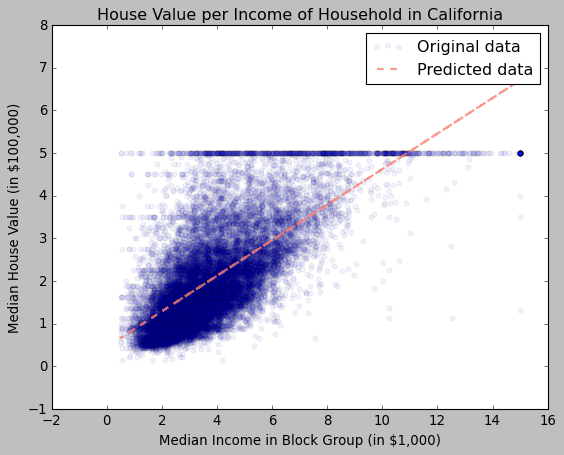

In [14]:
y_pred = linreg.predict(array(Xs).reshape(-1,1))

plt.scatter(Xs, ys, alpha=0.05, label='Original data')
plt.plot(Xs, y_pred, ls='--', lw=2, c='salmon', alpha=0.8, label="Predicted data")
plt.title('House Value per Income of Household in California')
plt.xlabel('Median Income in Block Group (in $1,000)')
plt.ylabel('Median House Value (in $100,000)')
plt.legend()
plt.show()

## Part 2: Testing against native library

In [15]:
from data_science.machine_learning import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, 0.33) 

In [17]:
from data_science import Simple_Linear_Regression

In [18]:
slr = Simple_Linear_Regression()

In [19]:
slr.fit(X_train, y_train, seed=42, learning_rate=0.00000001, num_epochs=1000)

loss: 9754.681: 100%|██████████████████████████████████████████████████████████████| 1000/1000 [01:26<00:00, 11.52it/s]


In [20]:
print("Beta:", slr.coefs()[0])
print("Intercept:", slr.coefs()[1])

Beta: 0.696646827744696
Intercept: 0.36330420399412233


In [21]:
y_test_pred = slr.predict(X_test)

In [22]:
mse2 = slr.mse(y_test, y_test_pred)
rmse2 = sqrt(mse2)
r2_2 = slr.r2()
print("RMSE:", rmse2)
print("R²:", r2_2)

RMSE: 0.9239004076055424
R²: 0.46907551886973287


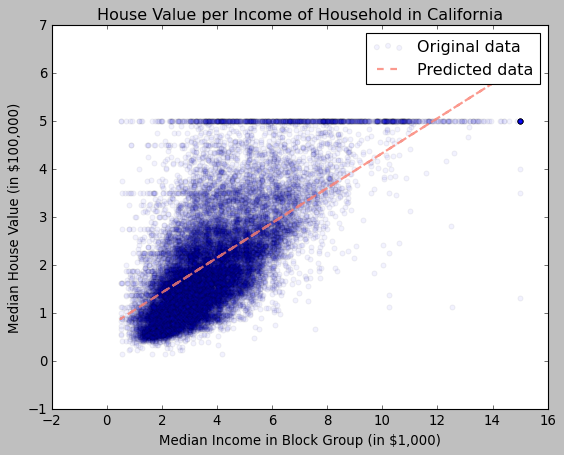

In [23]:
y_pred = slr.predict(Xs)

plt.scatter(Xs, ys, alpha=0.05, label='Original data')
plt.plot(Xs, y_pred, ls='--', lw=2, c='salmon', alpha=0.8, label="Predicted data")
plt.title('House Value per Income of Household in California')
plt.xlabel('Median Income in Block Group (in $1,000)')
plt.ylabel('Median House Value (in $100,000)')
plt.legend()
plt.show()

## Comparison

In [24]:
print("% diff RMSE:", (rmse2/rmse-1)*100)
print("% diff R²:", (r2_2/r2-1)*100)

% diff RMSE: 9.57260756641396
% diff R²: -0.23927411965711798


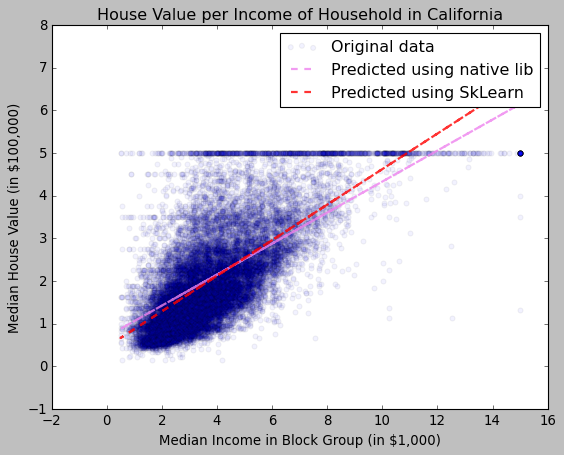

In [25]:
y_pred = slr.predict(Xs)
y_pred_skl = linreg.predict(array(Xs).reshape(-1,1))

plt.scatter(Xs, ys, alpha=0.05, label='Original data')
plt.plot(Xs, y_pred, ls='--', lw=2, c='violet', alpha=0.8, label="Predicted using native lib")
plt.plot(Xs, y_pred_skl, ls='--', lw=2, c='red', alpha=0.8, label='Predicted using SkLearn')
plt.title('House Value per Income of Household in California')
plt.xlabel('Median Income in Block Group (in $1,000)')
plt.ylabel('Median House Value (in $100,000)')
plt.legend()
plt.show()

In [26]:
slr.least_squares_fit(X_train, y_train)

(1.510815778861136, 0.14353079747417788)

In [27]:
print("Beta:", slr.coefs()[0])
print("Intercept:", slr.coefs()[1])

Beta: 1.510815778861136
Intercept: 0.14353079747417788


In [28]:
y_test_pred = slr.predict(X_test)

In [29]:
mse3 = slr.mse(y_test, y_test_pred)
rmse3 = sqrt(mse3)
r2_3 = slr.r2()
print("RMSE:", rmse3)
print("R²:", r2_3)

RMSE: 0.9967755281060732
R²: 0.2730537298273442


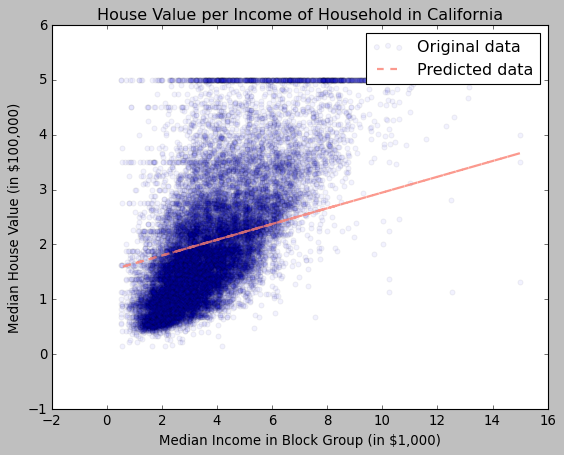

In [30]:
y_pred = slr.predict(Xs)

plt.scatter(Xs, ys, alpha=0.05, label='Original data')
plt.plot(Xs, y_pred, ls='--', lw=2, c='salmon', alpha=0.8, label="Predicted data")
plt.title('House Value per Income of Household in California')
plt.xlabel('Median Income in Block Group (in $1,000)')
plt.ylabel('Median House Value (in $100,000)')
plt.legend()
plt.show()

In [31]:
print("% diff RMSE:", (rmse3/rmse-1)*100)
print("% diff R²:", (r2_3/r2-1)*100)

% diff RMSE: 18.215440618793167
% diff R²: -41.92824567449718


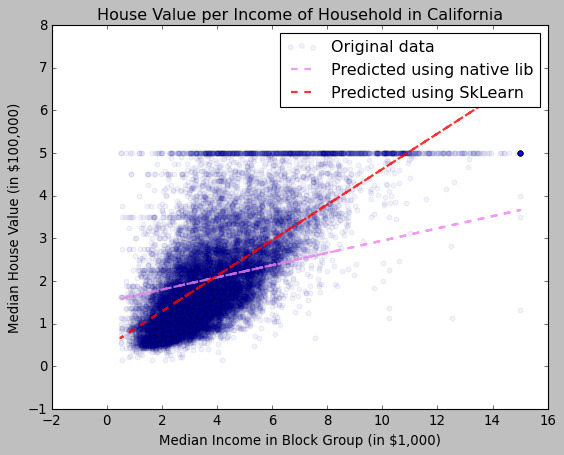

In [32]:
y_pred = slr.predict(Xs)
y_pred_skl = linreg.predict(array(Xs).reshape(-1,1))

plt.scatter(Xs, ys, alpha=0.05, label='Original data')
plt.plot(Xs, y_pred, ls='--', lw=2, c='violet', alpha=0.8, label="Predicted using native lib")
plt.plot(Xs, y_pred_skl, ls='--', lw=2, c='red', alpha=0.8, label='Predicted using SkLearn')
plt.title('House Value per Income of Household in California')
plt.xlabel('Median Income in Block Group (in $1,000)')
plt.ylabel('Median House Value (in $100,000)')
plt.legend()
plt.show()

In [33]:
x = [i for i in range(100)]

In [34]:
y = [xi*2+5 for xi in x]

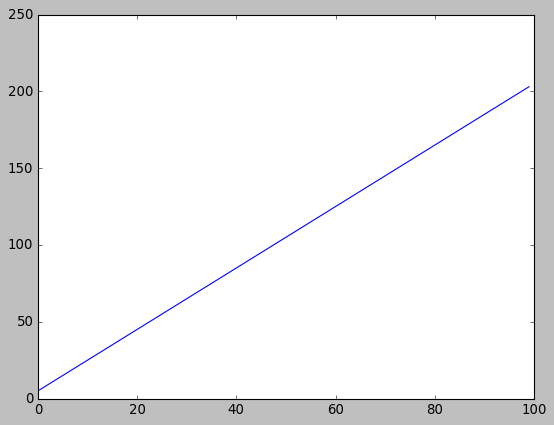

In [35]:
plt.plot(x,y)

In [36]:
linreg = LinearRegression()
linreg.fit(array(x).reshape(-1, 1),y)

LinearRegression()

In [37]:
linreg.coef_

array([2.])

In [38]:
linreg.intercept_

4.999999999999972

In [39]:
slr = Simple_Linear_Regression()

In [40]:
slr.fit(x,y, learning_rate=0.0000001, num_epochs=10000)

loss: 392.203: 100%|████████████████████████████████████████████████████████████| 10000/10000 [00:15<00:00, 638.44it/s]


In [41]:
slr.coefs()

(1.0687180566563208, 2.0592701366504635)

In [42]:
yp = slr.predict(x)

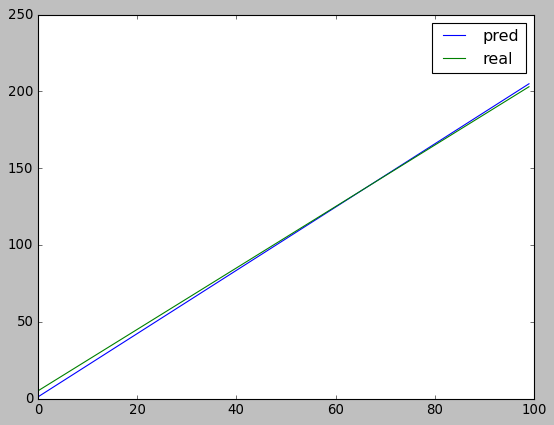

In [43]:
plt.plot(x,yp, label='pred')
plt.plot(x,y, label='real')
plt.legend()

In [44]:
slr.r2()

0.998823284757923

In [45]:
sqrt(slr.mse(y, yp))

1.4072675490520246

In [46]:
slr.least_squares_fit(x,y)

(6.048811881188115, 1.9788118811881188)

In [47]:
yp = slr.predict(x)

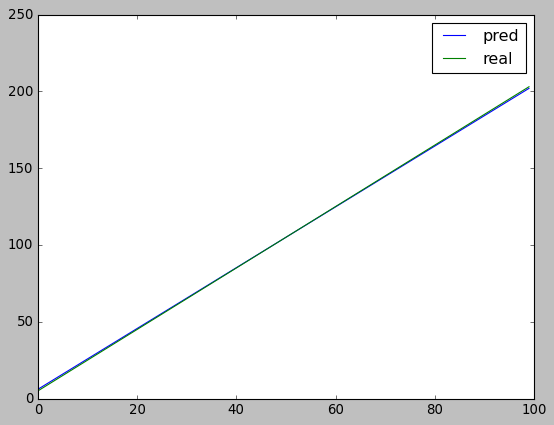

In [48]:
plt.plot(x,yp, label='pred')
plt.plot(x,y, label='real')
plt.legend()